In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
from option_prediction import option_prediction, OUTPUT_FOLDER
from plot_option_prediction import plot_option_prediction

In [15]:
#Dates for which we will predict stock prices - Option Expiry Dates, which end on Friday of any week
today = datetime.date.today()
start_date = datetime.date.today()+ datetime.timedelta( (4-today.weekday()) % 7 )
end_date = datetime.date.today() + datetime.timedelta(days=28)
delta = datetime.timedelta(days=7)

option_dates = []

while start_date <= end_date:
    o_d = start_date.strftime("%Y-%m-%d")
    option_dates.append(o_d)
    start_date += delta


option_dates = option_dates[:4]
option_dates

['2020-09-18', '2020-09-25', '2020-10-02', '2020-10-09']

In [11]:
Company_Names = ["AMZN", "MSFT","AAPL", "TSLA","NFLX","FB","V","NVDA","GOOG","ZM","BA","INTC",'AMD',"F","GE","AAL",\
                 "DIS", "DAL", "CCL", "SNAP","UAL","BABA","UBER","TWTR","SBUX","SPY","QQQ","BYND","SQ","PENN",\
                 "XOM", "SHOP","ATVI","WMT","MRNA","JPM","GS","C","SNE","MGM"]

In [16]:
x_dates = []
for x in option_dates:
    x_date = datetime.datetime.strptime(x, "%Y-%m-%d")
    x_dates.append(x_date)

Today = [None] * (np.shape(Company_Names)[0]*np.shape(option_dates)[0])

Today = [datetime.datetime.today() if x==None else x for x in Today]

Days_to_Exp = [((a - b).days + 1) for a, b in zip(x_dates, Today)]
Days_to_Exp = Days_to_Exp[:4]
Days_to_Exp

[0, 7, 14, 21]

In [17]:
test = option_prediction(Company_Names=Company_Names, option_dates=option_dates, output_folder=OUTPUT_FOLDER)
test

[*********************100%***********************]  1 of 1 completed


/Users/xpatricklorenzx/Desktop/skriptstuff/Option_Predictionand_Fundamentals/option_prediction.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigC_OI['OI_PCT'] = Calls_OI_PCT
/Users/xpatricklorenzx/Desktop/skriptstuff/Option_Predictionand_Fundamentals/option_prediction.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigP_OI['OI_PCT'] = Puts_OI_PCT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Tickers,Todays Price,Option Exp Date,Days_to_Exp,Calls_WOI,Puts_WOI,CPSP,implied Change to prior week,implied %Change to prior week
0,AMZN,2948.229980,2020-09-18,0,3400.311293,2679.072032,3111.815589,163.585608,5.548604
1,AMZN,2948.229980,2020-09-25,7,3473.873114,3045.193484,3302.401262,190.585673,6.124581
2,AMZN,2948.229980,2020-10-02,14,3411.185645,3001.134966,3247.165373,-55.235889,-1.672598
3,AMZN,2948.229980,2020-10-09,21,3442.881679,2933.681474,3239.201597,-7.963776,-0.245253
4,MSFT,199.949997,2020-09-18,0,228.395795,175.195020,207.115485,7.165488,3.583640
...,...,...,...,...,...,...,...,...,...
155,SNE,78.980003,2020-10-09,21,81.733333,74.775362,78.950145,-0.596021,-0.749277
156,MGM,22.049999,2020-09-18,0,23.320768,14.543798,19.809980,-2.240020,-10.158819
157,MGM,22.049999,2020-09-25,7,24.149745,21.255927,22.992218,3.182238,16.063813
158,MGM,22.049999,2020-10-02,14,24.534676,20.864130,23.066458,0.074240,0.322892


[1.552259452548729, 4.001317180733329, -0.7502889186420711, 0.15451378201919805]
Exported: Option_Weekly_csv/2020_09_18/Option_Weekly_Plot_2020_09_18.pdf


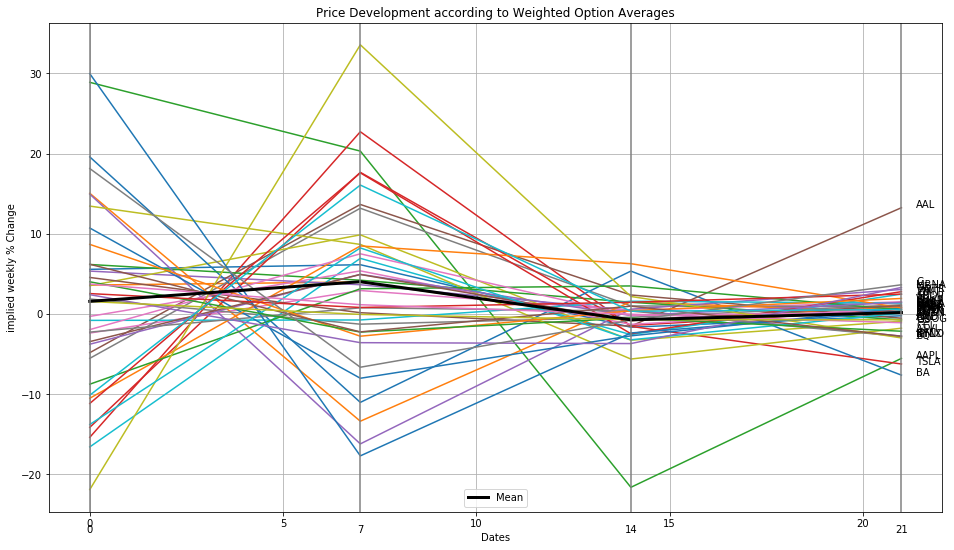

In [18]:
plot_option_prediction(option_prediction=test, Company_Names=Company_Names, 
                       Days_to_Exp=Days_to_Exp, output_folder=OUTPUT_FOLDER)

In [ ]:
def visualize_tree (classifier, X, y, boundaries=True, xlim=True, ylim=True):

    classifier.fit(X,y)
    
    if xlim is None:
        xlim =  (X[:,0].min() - 0.1, X[:,0].max() + 0.1)
    if ylim is None:
        ylim =  (X[:,1].min() - 0.1, X[:,1].max() + 0.1)
        
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
                        
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy, Z, alpha = 0.2, cmap = 'jet')
    
    plt.scatter (X[:,0], X[:,1], c=y, cmap ='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    def plot_boundaries(i, xlim, ylim):
        
        if i < 0:
            return
        
        tree = classifier.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                           [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                           [tree.threshold[i], xlim[1]], ylim)
            
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                           [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                           [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [ ]:
clf = DecisionTreeClassifier(max_depth=1, random_state = 0)

strikes = ticker_puts['strike']
openInterest = ticker_puts['openInterest']



#my_X = np.array((ticker_puts['strike'], ticker_puts['openInterest']))
arg = np.where(ticker_puts['openInterest'] > x)[0]
my_X = np.array((ticker_puts['strike'][arg], ticker_puts['openInterest'][arg]))
my_Y = np.ones(my_X.shape[1])
arg_calls = np.where(ticker_calls['openInterest'] > x)[0]
my_X_calls = np.array((ticker_calls['strike'][arg_calls], ticker_calls['openInterest'][arg_calls]))
my_Y_calls  = np.zeros(my_X_calls.shape[1])
X = np.hstack((my_X, my_X_calls)).T
Y = np.hstack((my_Y, my_Y_calls))


visualize_tree(clf, X, Y, True, None, None)

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')